<a href="https://colab.research.google.com/github/Thames07/Machine-learning-project/blob/main/Machine_learning_sportify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Clean the data - Data cleaning guide
Explore the data - 

Data Exploration & Analysis

Preprocessing & Feature engineering

Build and evaluate your model

Showcase your results

Review and document your project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading our dataset


In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df.shape

(114000, 21)

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)
df.shape

(114000, 20)

In [6]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

#### Here our target variable is the popularity

In [8]:
df.popularity.min()

0

In [10]:
df.popularity.max()

100

#### Data Analysis (EDA)
In EDA, we always compare with the dependent variable, here Popularity. So we see the relationships of different features with this variable.

Missing Values

Duplicate values

All the numerical variables

Distribution of the numerical variables: Check the skewness of the features.

Categorical variables

Cardinality of Categorical variables

Outliers

Relationship between independent and dependent features

#### Missing Values

In [11]:
features_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>0]
features_with_nan

['artists', 'album_name', 'track_name']

In [12]:
for feature in features_with_nan:
    print('Number of missing value in {}: {}'.format(feature,np.round(df[feature].isna().sum())))

Number of missing value in artists: 1
Number of missing value in album_name: 1
Number of missing value in track_name: 1


#### We can see that there is only one missing value in each of the columns. Since there are many less of these nan values than there are entries overall, we can discard them.

In [13]:
data=df.dropna()

In [14]:
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### Eliminating duplicates

In [15]:
data=data.drop_duplicates()

In [16]:
data.shape

(113549, 20)

#### Numerical features

In [17]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical]

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


#### Selecting out the discrete features among the numerical features and finding their relationship with popularity



In [18]:
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

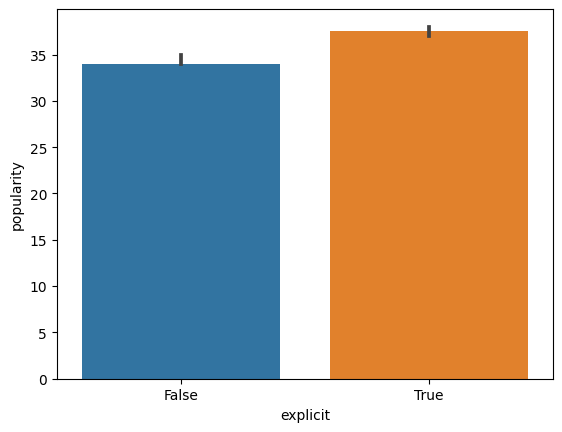

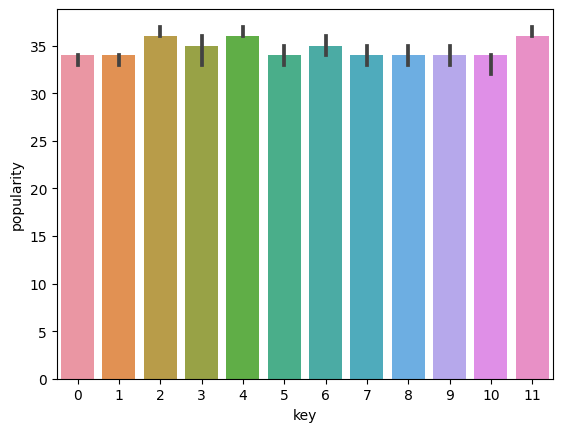

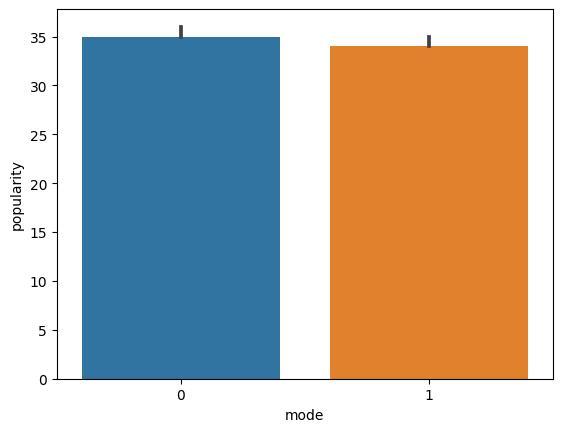

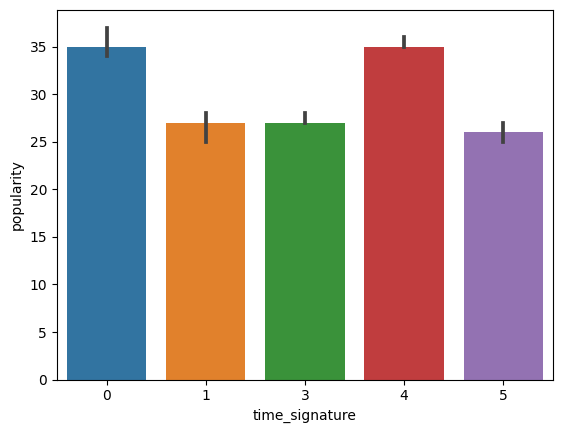

In [19]:
for feature in feature_discrete_numerical:
    dataset=data.copy()
    sns.barplot(x=feature, y=dataset['popularity'], data=dataset, estimator=np.median)
    plt.show()

#### Observation:
1. We can see that songs with explicit lyrics tend to be more well-liked than ones without such lyrics.

2. Songs or tunes that are popular in other keys tend to be less popular overall. All keys of songs are roughly equally popular.

3. The tracks in both modes, the major and the minor, are equally popular.
The number of beats in each bar is indicated by the time signature (meter), which is a notational convention. Considering the data dictionary's time signatures of 3/4 to 7/4, the time_signature should be between 3 and 7. But in this case, time_signature is between 0 and 5. Most likely, we'd convert these to Feature Selection. Currently, it appears that tracks with time_signature values of 0 and 4 are more popular than others.

#### Selecting the continuous features among the numerical features and finding their distribution

In [20]:
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]

In [21]:
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [22]:
from scipy.stats import skew

popularity skewness is : 0.04222809948109981


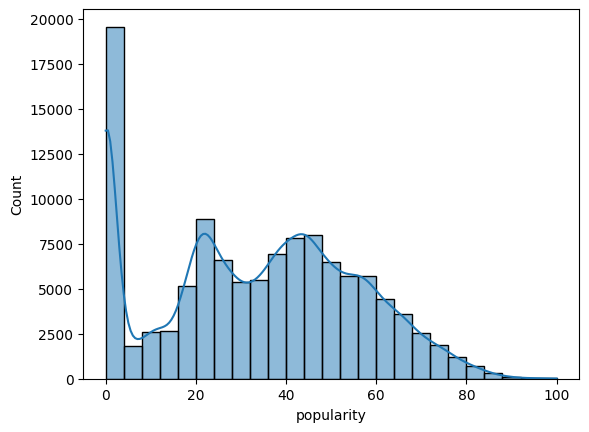

duration_ms skewness is : 10.814434004933338


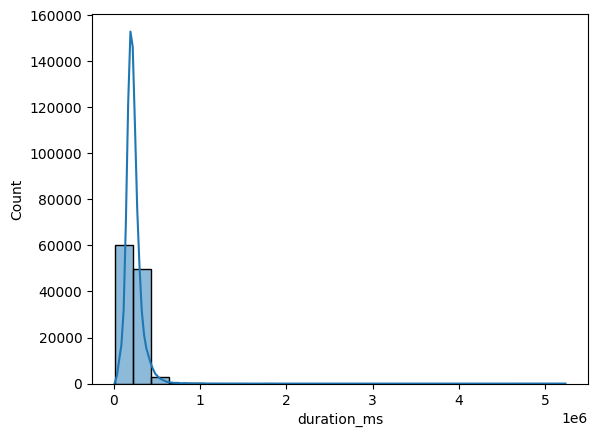

danceability skewness is : -0.4003991295600715


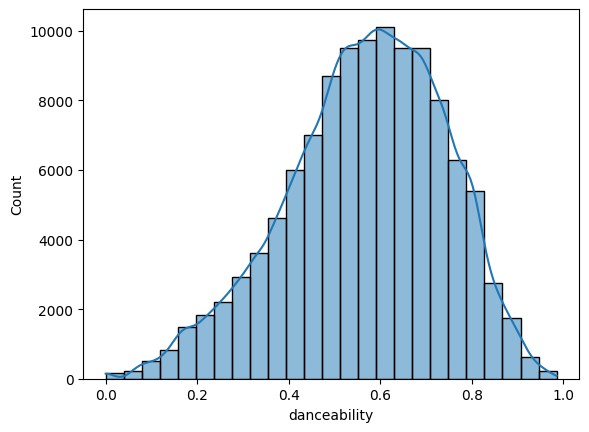

energy skewness is : -0.598542182428158


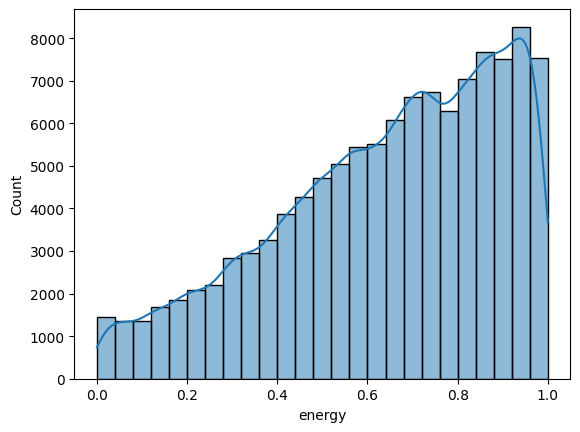

loudness skewness is : -2.0133133823721505


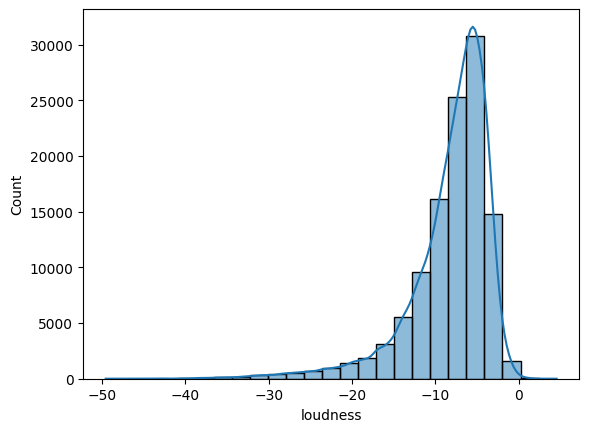

speechiness skewness is : 4.644508700286168


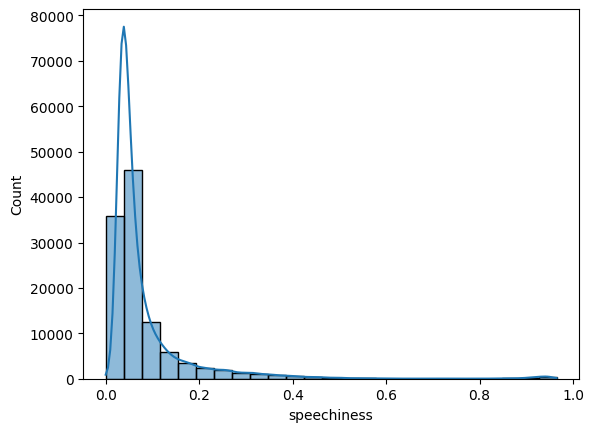

acousticness skewness is : 0.7302103030827026


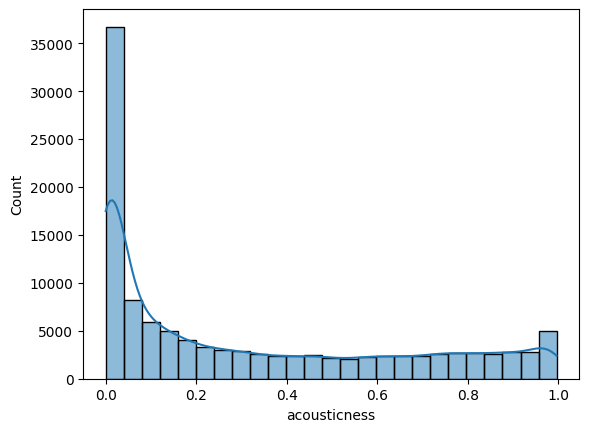

instrumentalness skewness is : 1.7377466866935405


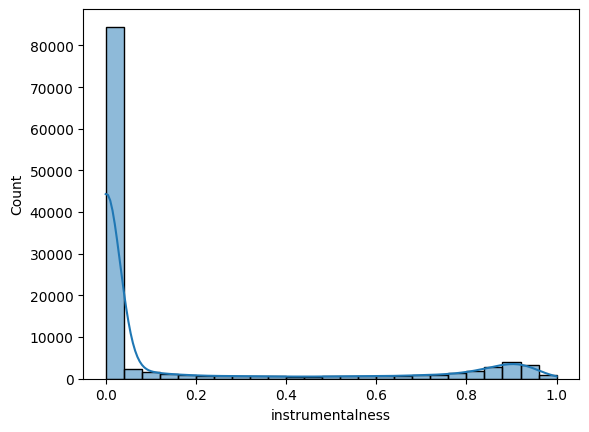

liveness skewness is : 2.1054497237799685


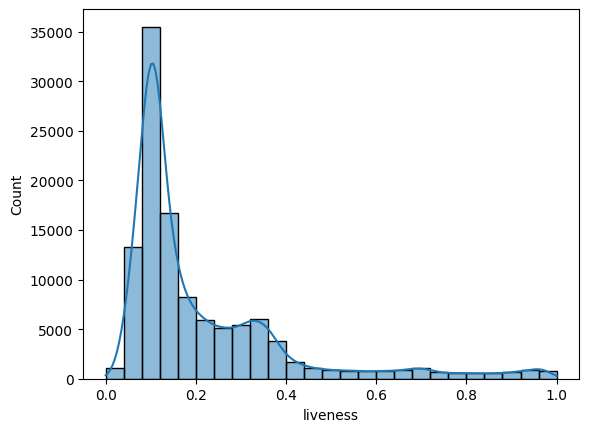

valence skewness is : 0.11477275798096229


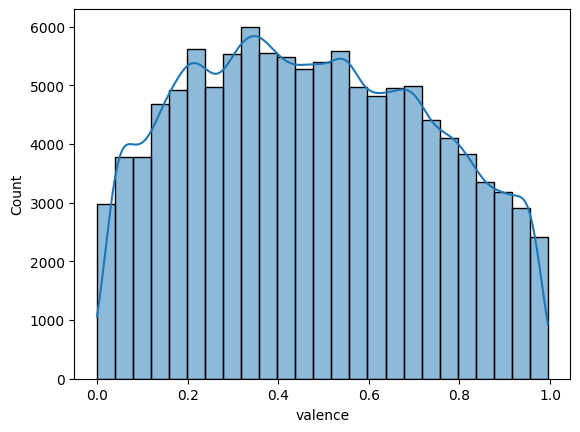

tempo skewness is : 0.23160111991386964


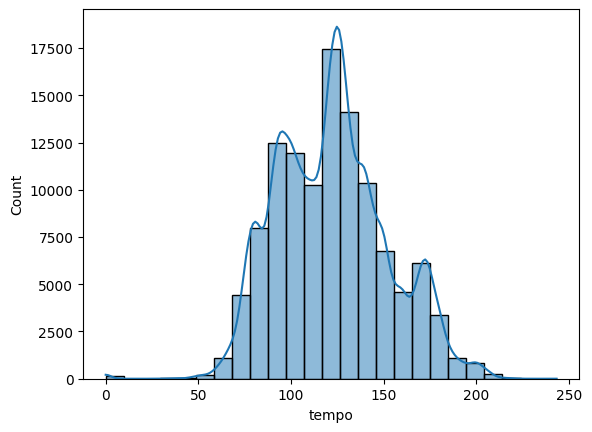

In [23]:
for feature in features_continuous_numerical:
    dataset=data.copy()
    print(feature, 'skewness is :', skew(dataset[feature]))
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    plt.show()

#### Observation:
We see that danceability, valence and tempo are almost normal distribution.

Loudness is left skewed.

Rest all are right skewed.


Now to remove the skewness, we can perform operations like log transformation, square-root transformation etc. But before applying any of the methods, lets check the correlation of the continuous features with the target.

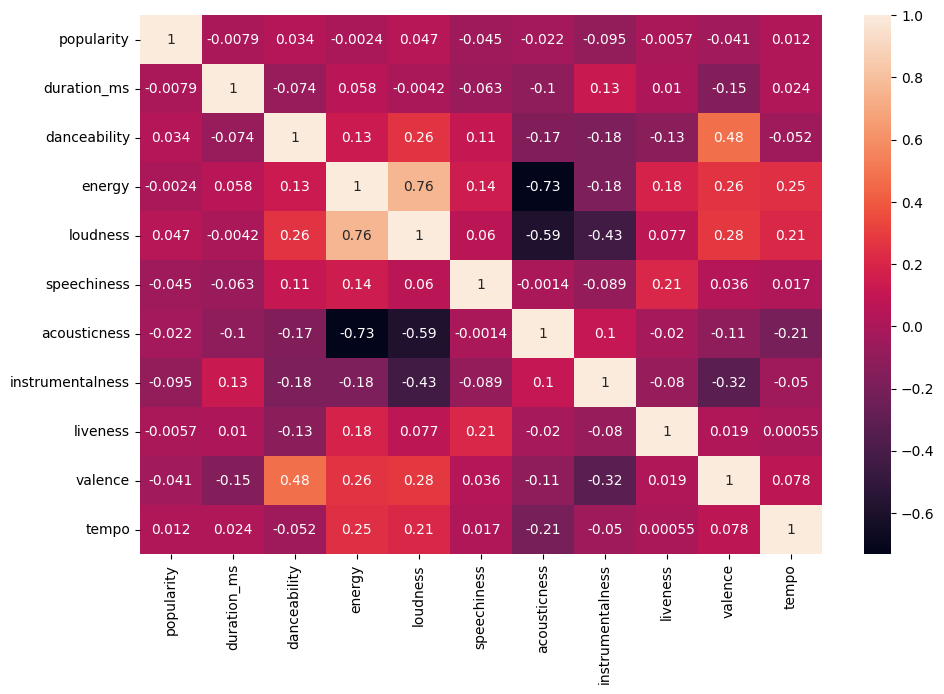

In [24]:
dataset=data.copy()
plt.figure(figsize=(11,7))
sns.heatmap(data[features_continuous_numerical].corr(), annot=True)
plt.show()

#### We can see that there is little link between any of the continuous parameters and the popularity of the target variable. Therefore, if we use the regresion model, we can carry out the changes. Other models, like SVM, Tree-based techniques, and XG boost, do not call for these changes. In feature engineering, we would deal with the transformations.


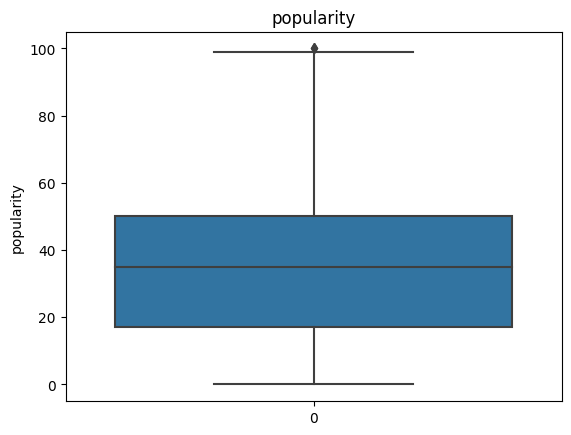

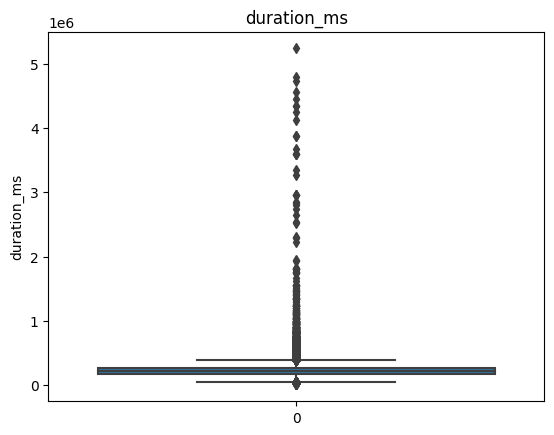

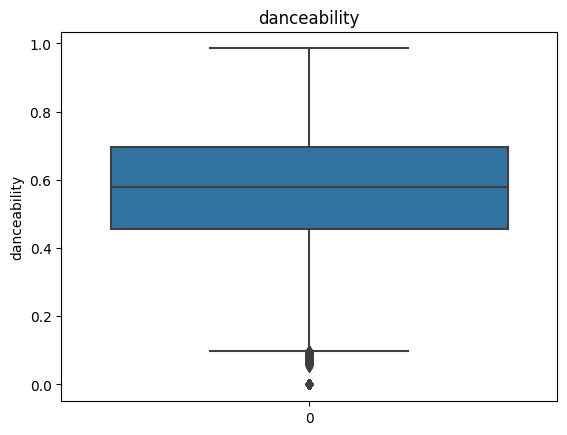

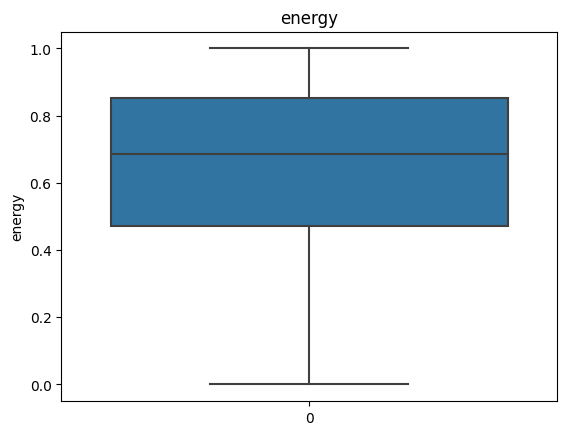

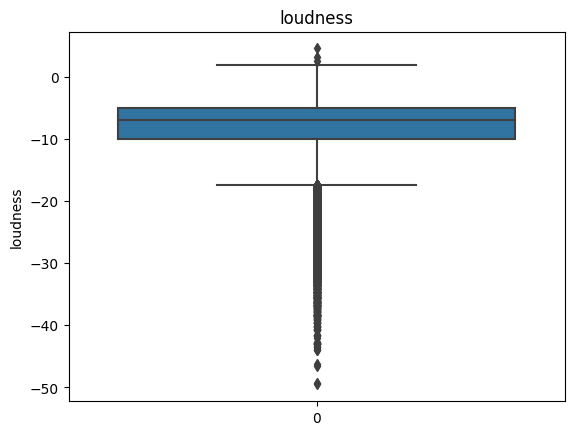

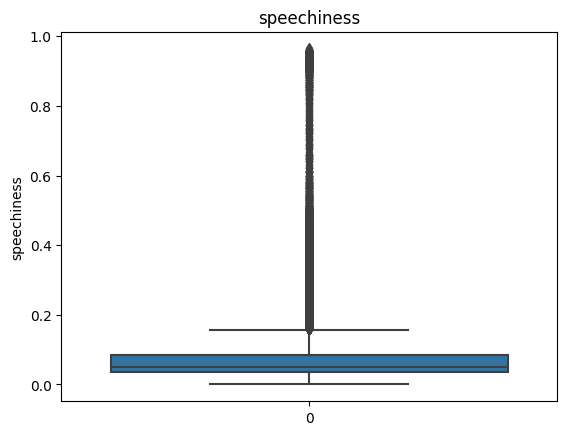

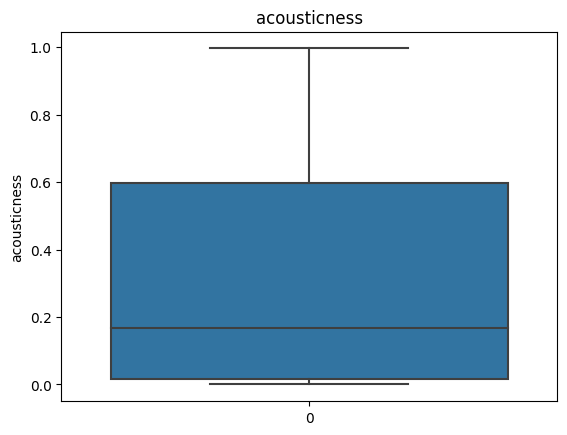

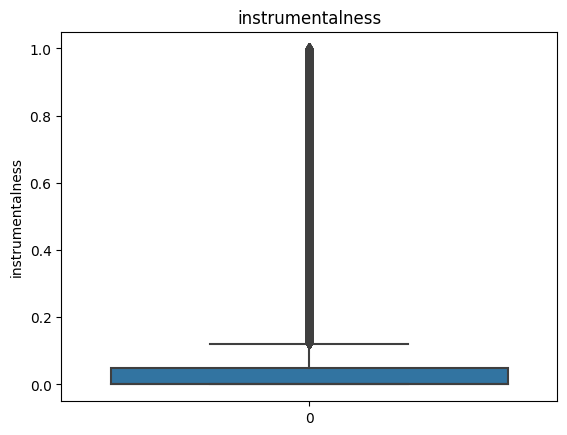

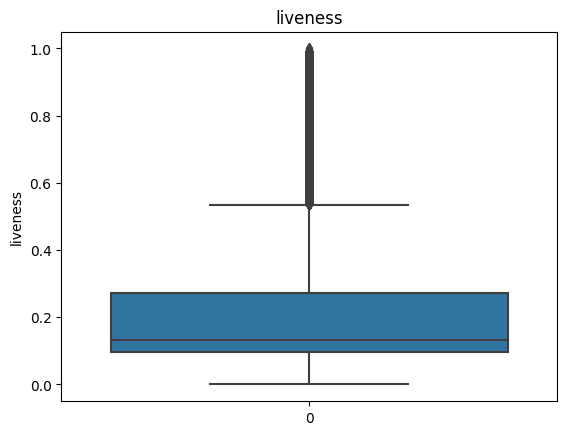

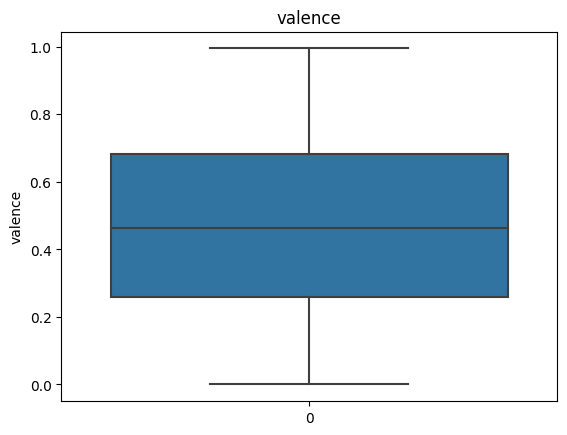

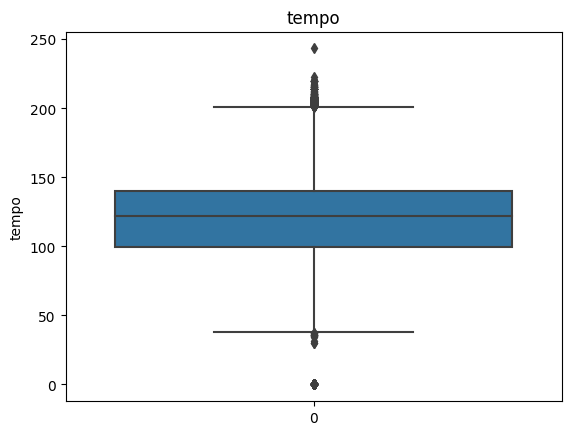

In [25]:
# checking the outliers
for feature in features_continuous_numerical:
    dataset=data.copy()
    sns.boxplot(data=dataset[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Apart from energy, acousticness, and valence, we can see that most of the features have a significant number of outliers.


In [26]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [27]:
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

#### Track_id would be one of the category features that would be exclusive to each entry. We can remove this column later. Let's look at the cardinality of the categorical characteristics to see how many distinct variables there are.




In [28]:
for feature in feature_categorical:
    dataset=data.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89740
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 114


#### Observation: There are a lot of unique entries in each of the categorical features.

Names like track name, album name, artist name, etc. make up the majority of the category features. Every song or track has a different track_id. We can abandon this later. The track_genre can affect how popular a song is.


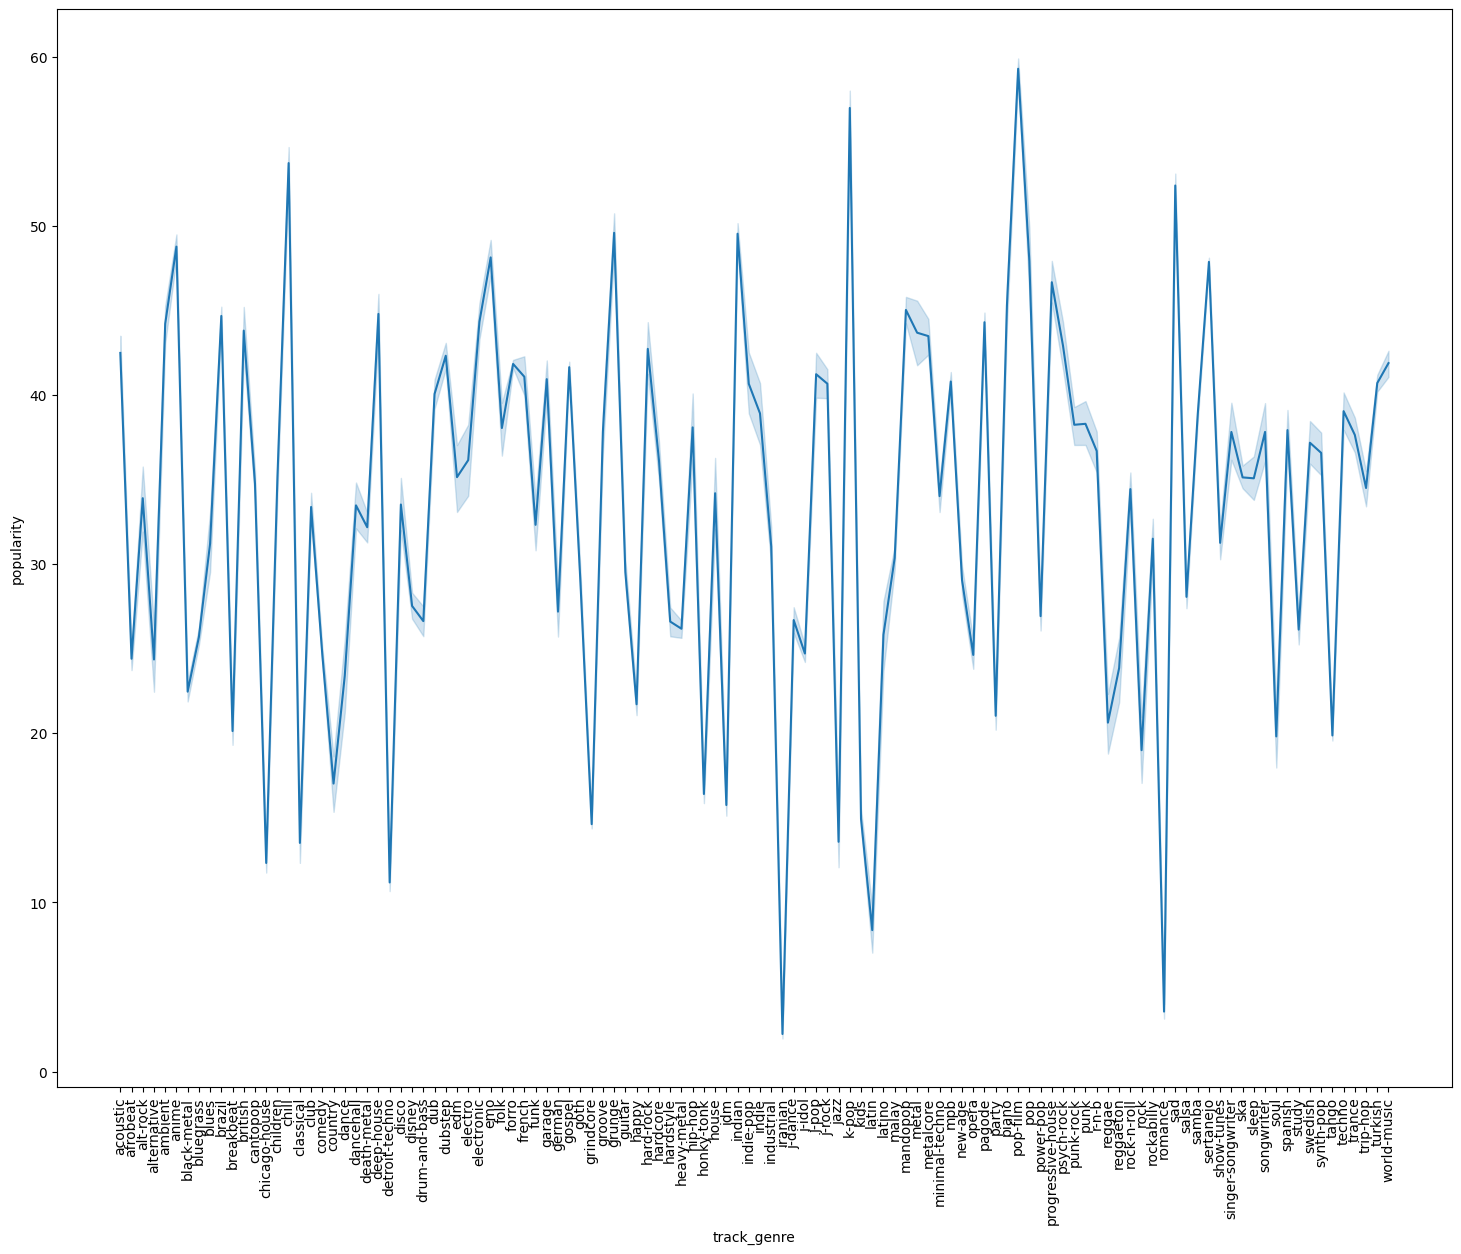

In [30]:
dataset=data.copy()
plt.figure(figsize=(18,14))
sns.lineplot(x='track_genre', y='popularity', data=dataset)
plt.xticks(rotation=90)
plt.show()

#### Feature engineering
In feature engineering, we would perform the following steps:

1. To express the existence of spoken words in a track, change the speechiness column.

2. Using the regression process, eliminate skewness in the data for continuous numerical features used in prediction.

3. the categorical variables being encoded.

4. Set all of the variable values to fall inside the same range.

#### Working on the speechiness column.

The speechiness column determines if there are spoken words in a track based on the data description. The attribute value will be closer to 1.0 the more exclusively speech-like the recording is (such as a talk show, audio book, or piece of poetry). Tracks that are most likely formed entirely of spoken words have values above 0.66. Tracks that may include both music and speech, either in portions or layered, are described by values between 0.33 and 0.66, encompassing situations like rap music. Values less than 0.33 most likely refer to tracks that are not speech-like, like music.

So we can convert this column to discrete features. High, medium and low speechiness based on the range.

1. For Values Above 0.66, High

2. For values between 0.33 and 0.66, medium

3. Low for numbers under 0.33

In [31]:
data['speechiness'].sort_values()

101681    0.000
98779     0.000
101663    0.000
101666    0.000
101667    0.000
          ...  
18227     0.962
18432     0.962
18530     0.963
18504     0.963
18152     0.965
Name: speechiness, Length: 113549, dtype: float64

Now, we would make a new column for the speechiness which wouuld depict whether the track has high, low or medium speechiness.

In [32]:
speechiness_type=[]
for i in data.speechiness:
    if i<0.33:
        speechiness_type.append('Low')
    elif 0.33<=i<=0.66:
        speechiness_type.append('Medium')
    else:
        speechiness_type.append('High')

In [34]:
data['speechiness_type']=speechiness_type
print(data.speechiness_type.value_counts())
data


Low       109947
Medium      2726
High         876
Name: speechiness_type, dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Low
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Low


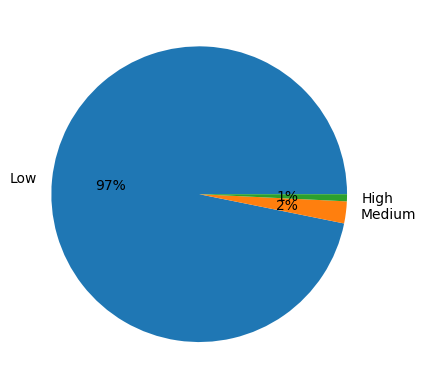

In [35]:
plt.pie(x=data['speechiness_type'].value_counts(),labels=data['speechiness_type'].unique(), autopct='%.0f%%')
plt.show()

Thus, 97% of tracks are not overly speechy. Therefore, rather than being raps, the majority of the tracks are melodies.


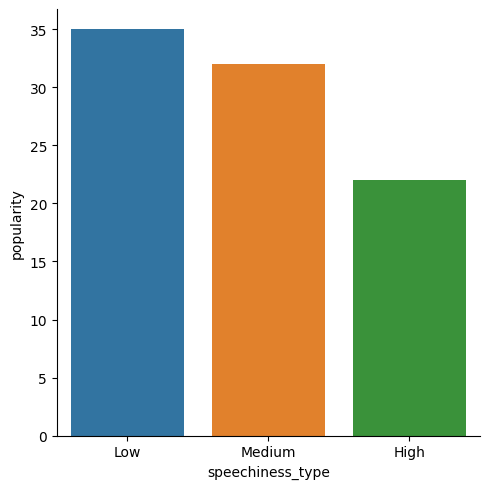

In [36]:
sns.catplot(data=data, x='speechiness_type', y='popularity', kind='bar', errorbar=None, estimator=np.median)
plt.show()

The music with a low speechiness score highly on the popularity scale. It demonstrates that, in contrast to rap songs, individuals prefer more melodious melodies.

#### Skewness

We must cope with the skewness of the continuous data for regression models. The regression models would not produce accurate predictions if the data were biased.However, we do not need to change the skewness for other models, such as decision tree, random forest, etc. We noticed that majority of the continuous columns an in this dataset are skewed. To use them with regression models, we must change them. We learned using EDA that the popularity of the target variable did not significantly correlate with the continuous features. So that we can see the outcomes, we can lessen their skewness.

creating a gaussian distribution out of the features for regression models.


In [37]:
data.drop(data.columns[0], axis=1, inplace=True)

In [38]:
#Selecting the numerical features:
feature_numerical=[feature for feature in data.columns if data[feature].dtypes!='O']

In [39]:
#Selecting the discrete numerical features
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]

In [40]:
#Selecting the continuous features
feature_continuous_numerical=[feature for feature in feature_numerical if feature not in feature_discrete_numerical]
feature_continuous_numerical


['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [41]:
data.shape

(113549, 20)

In [42]:
dataset_log=data.copy()
dataset_reci=data.copy()
dataset_sqrt=data.copy()
dataset_expo=data.copy()

In [43]:
from scipy import stats

In [45]:
for feature in feature_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


popularity original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766


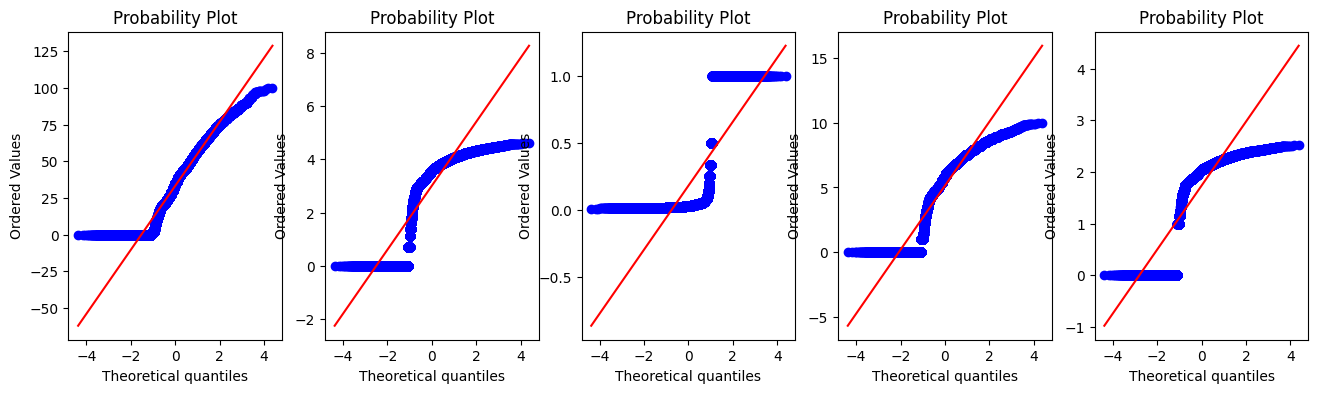

duration_ms original skewness: 10.814434004933338
logarithmic: -0.31958068443270016
reciprocal:  5.062710652230053
square-root: 1.7918392897162523
exponential: 0.3280005714079256


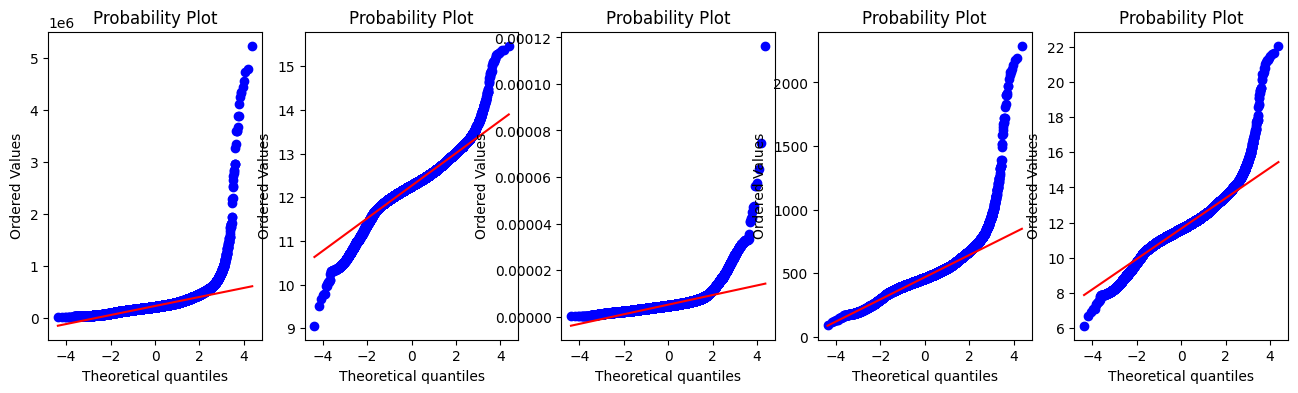

danceability original skewness: -0.4003991295600715
logarithmic: -0.7033043814280042
reciprocal:  1.0423257462450115
square-root: -1.078209424796711
exponential: -3.4689794311862756


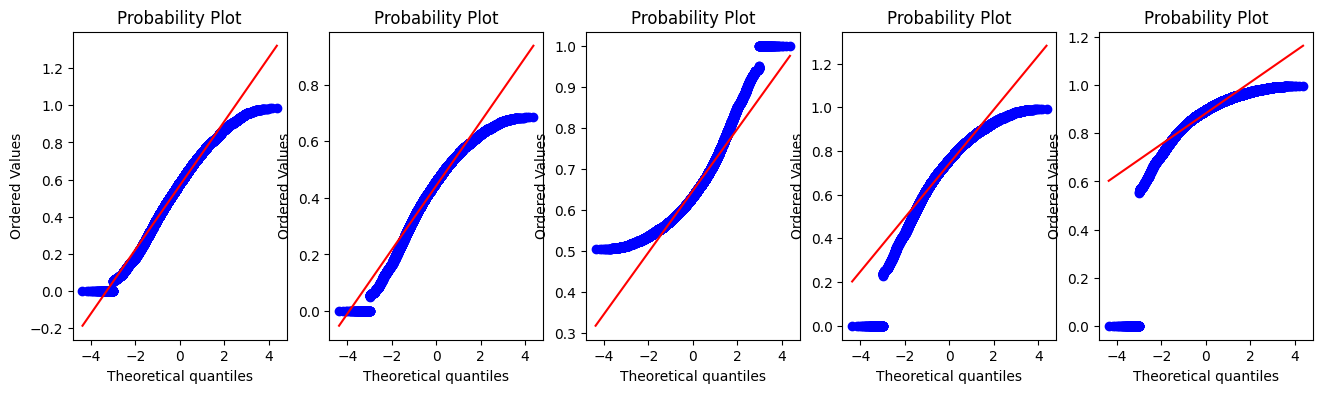

energy original skewness: -0.598542182428158
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462225
exponential: -2.2008891779513866


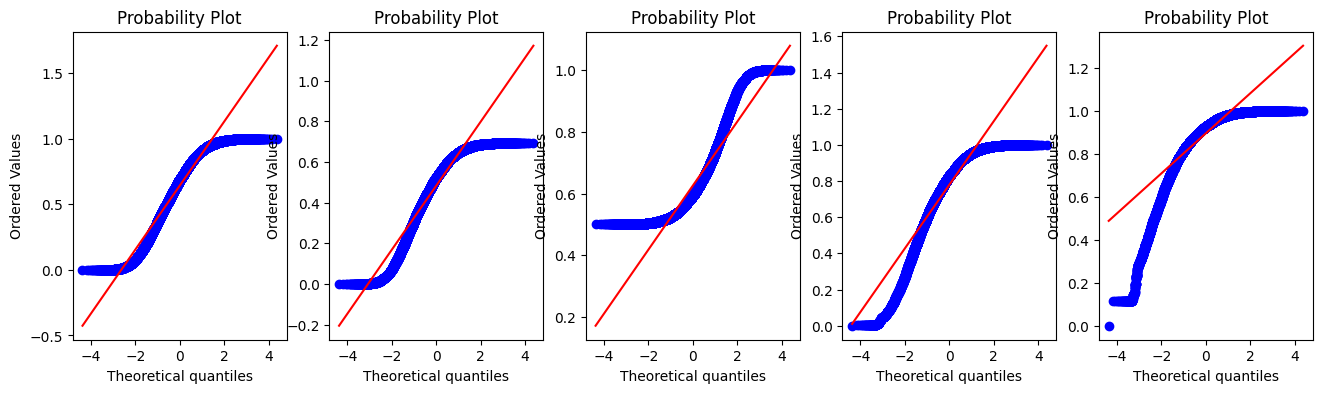

loudness original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.341700995068464
square-root: nan
exponential: nan


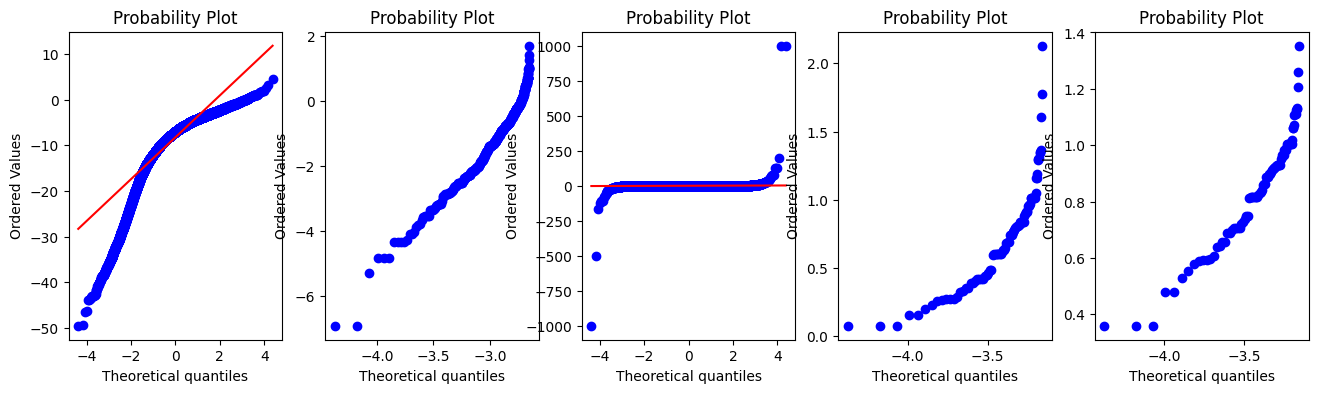

speechiness original skewness: 4.644508700286168
logarithmic: 3.7094268216147412
reciprocal:  -3.0189124109405174
square-root: 2.5106804244132315
exponential: 1.2585346167026825


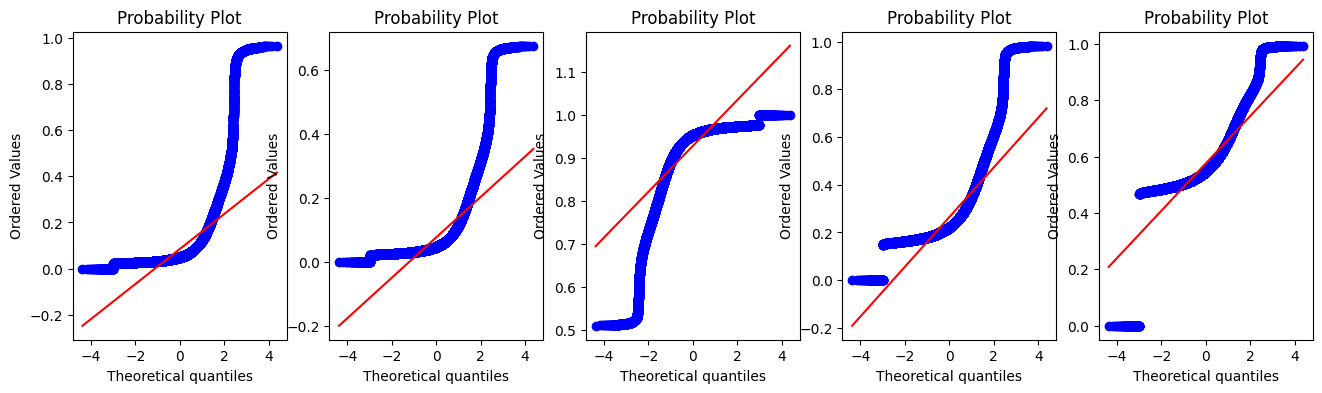

acousticness original skewness: 0.7302103030827026
logarithmic: 0.5532779927877304
reciprocal:  -0.3889970180312751
square-root: 0.19182418700584433
exponential: -0.45691650644198106


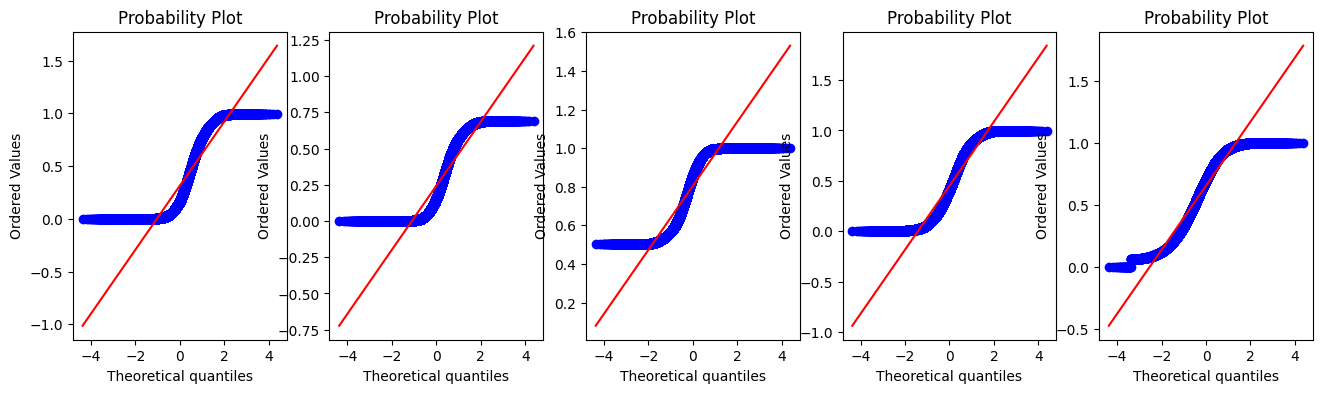

instrumentalness original skewness: 1.7377466866935405
logarithmic: 1.6547543527716166
reciprocal:  -1.5785769487599546
square-root: 1.4467885078056792
exponential: 0.929297080678929


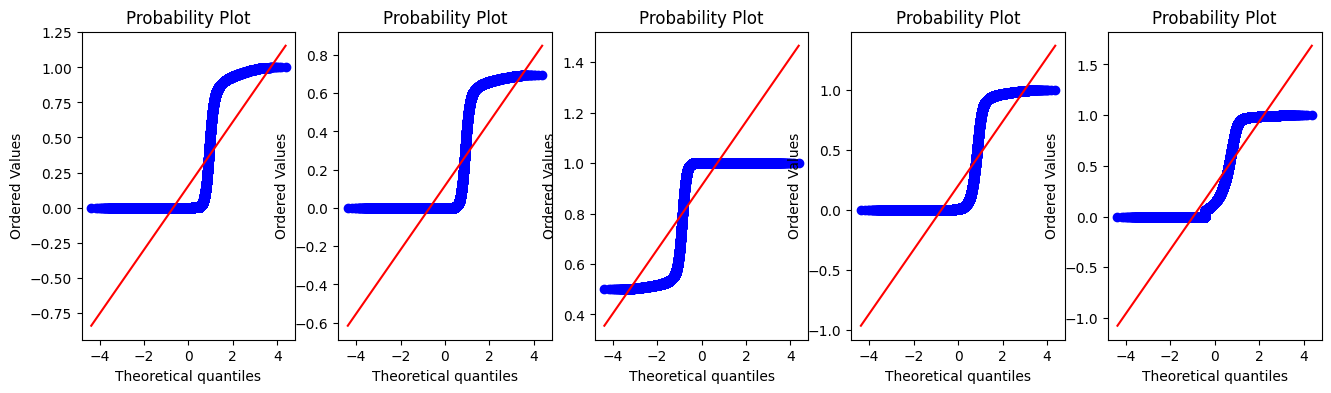

liveness original skewness: 2.1054497237799685
logarithmic: 1.7355487100916003
reciprocal:  -1.409425059871828
square-root: 1.3311332380750938
exponential: 0.8567637835174635


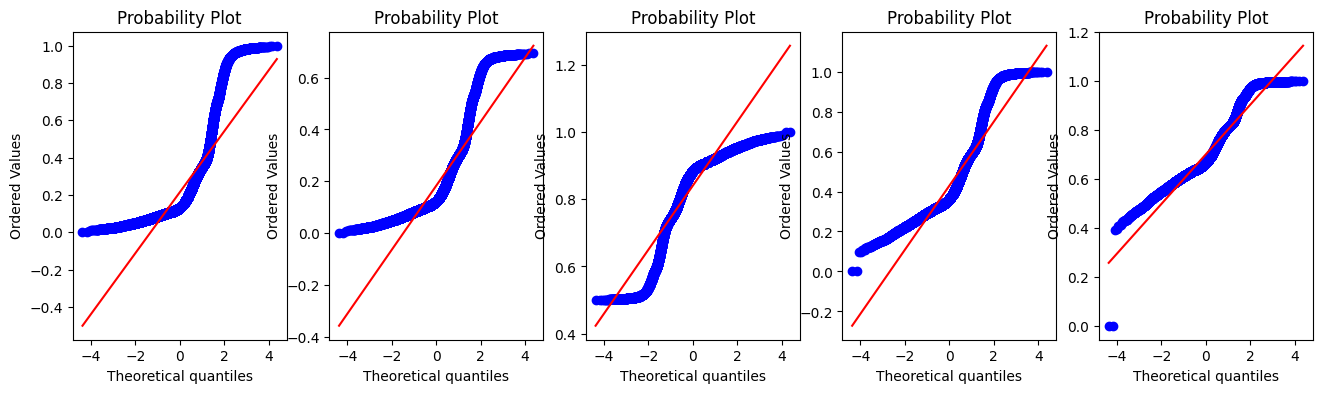

valence original skewness: 0.11477275798096229
logarithmic: -0.14268054744317982
reciprocal:  0.40566649459831094
square-root: -0.4685261380695686
exponential: -1.3963500280712502


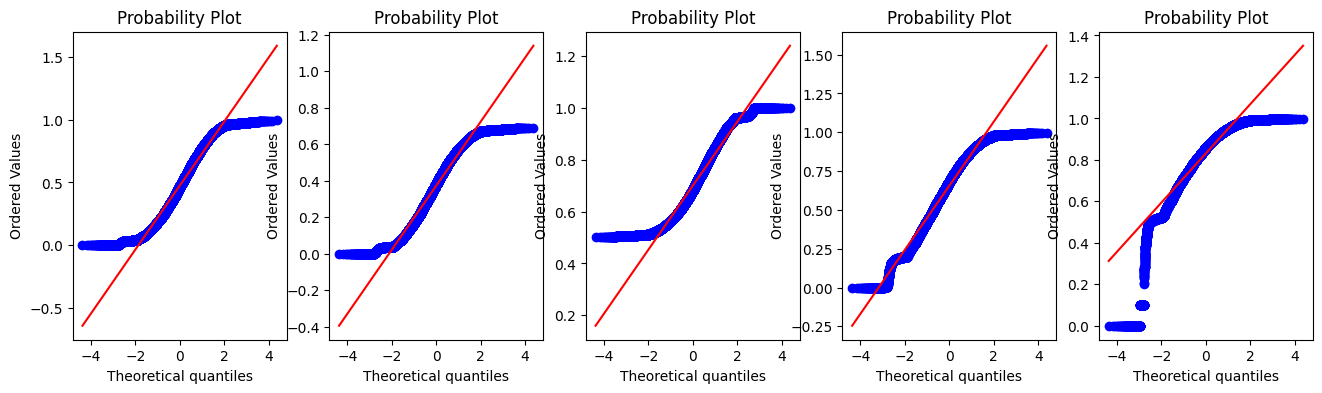

tempo original skewness: 0.23160111991386964
logarithmic: -5.502750438724598
reciprocal:  26.694049451308892
square-root: -0.5935911783686282
exponential: -5.885488448988585


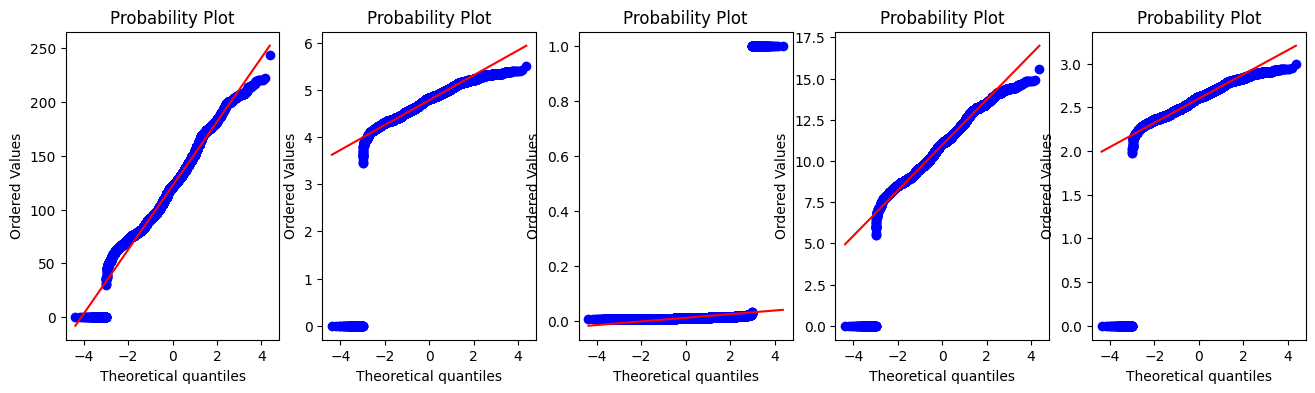

In [46]:
for feature in feature_continuous_numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,5,1)
    print(feature, 'original skewness:', skew(data[feature]))
    stats.probplot(data[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,2)
    print('logarithmic:', skew(dataset_log[feature]))
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,3)
    print('reciprocal: ', skew(dataset_reci[feature]))
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,4)
    print('square-root:', skew(dataset_sqrt[feature]))
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,5)
    print('exponential:', skew(dataset_expo[feature]))
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    
    plt.show()

#### Observations:

1. The skewness for popularity, danceability, energy, valence, or tempo is not improved by any of the strategies. The popularity, danceability, energy, valence, and tempo should not be altered because they were already less skewed.

2. For duration_ms, exponential and logarithmic transformation produced favorable results.

3. Since there are negative values for loudness, exponential and logarithmic transformations are inapplicable. Reciprocal relationships don't work well.

4. The exponential transformation effectively handles talkativeness, instrumentality, and liveliness.

5. Square-root transformation is the most effective way to handle acousticness. Therefore, we would change the square root of acousticness. Speechiness, instrumentalness, liveness, and duration_ms exponentially change.

We can separate the data for regression and the other models before performing any treatment.

In [47]:
data['acousticness']=data['acousticness']**(1/2)
data[['speechiness','instrumentalness','liveness','duration_ms']]=data[['speechiness','instrumentalness','liveness','duration_ms']]**(1/5)

In [48]:
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.7150,87.917,4,acoustic,Low
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.2670,77.489,4,acoustic,Low
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.1200,76.332,4,acoustic,Low
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.1430,181.740,3,acoustic,Low
4,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.1670,119.949,4,acoustic,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,13.094590,False,0.172,0.2350,5,-16.393,1,0.530961,0.800000,0.985166,0.612636,0.0339,125.995,5,world-music,Low
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,13.094597,False,0.174,0.1170,0,-18.318,0,0.525568,0.996995,0.995153,0.637144,0.0350,85.239,4,world-music,Low
113997,Cesária Evora,Best Of,Miss Perfumado,22,12.210771,False,0.629,0.3290,0,-10.895,0,0.530457,0.931128,0.000000,0.609189,0.7430,132.378,4,world-music,Low
113998,Michael W. Smith,Change Your World,Friends,41,12.320574,False,0.587,0.5060,7,-10.889,1,0.494939,0.617252,0.000000,0.769614,0.4130,135.960,4,world-music,Low


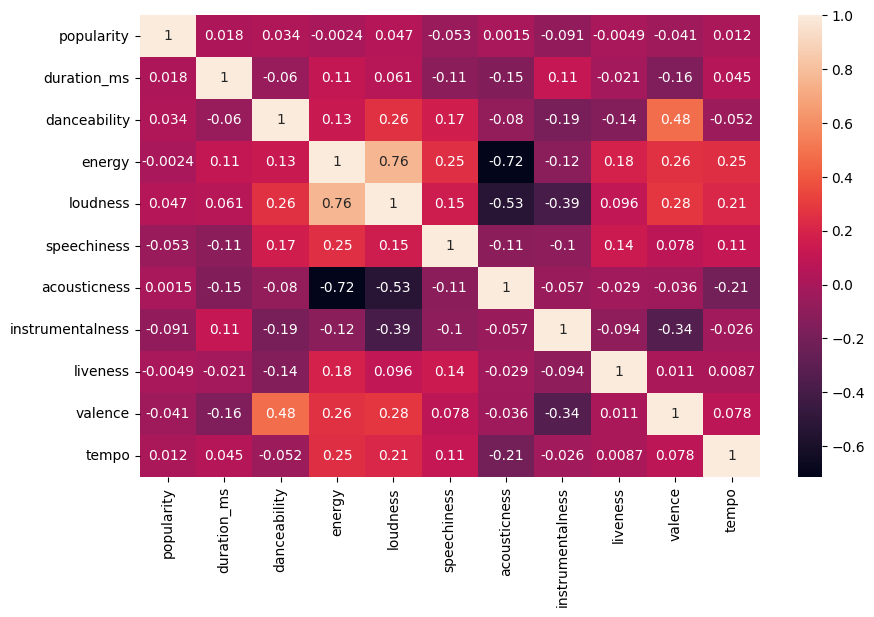

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(data[feature_continuous_numerical].corr(), annot=True)
plt.show()

#### Encoding the categorical columns:



In [50]:
feature_categorical=[feature for feature in data.columns if feature not in feature_numerical]


In [51]:
dataset=data.copy()
for feature in feature_categorical:
    print(feature,': {}, missing values {}'.format(data[feature].nunique(), data[feature].isna().sum()))


artists : 31437, missing values 0
album_name : 46589, missing values 0
track_name : 73608, missing values 0
track_genre : 114, missing values 0
speechiness_type : 3, missing values 0


The popularity of a song can surely be influenced by its genre because everyone has different preferences. The popularity of a song can also be influenced by the name of the musician because well-known artists usually have more well-liked songs. The popularity can also be influenced by the track and album names. We would choose the BaseN encoder because each of these columns has a substantial number of unique entries.

One-hot encoding, or precisely dummy encoding, can transform speechiness_type. We can use BaseN encoding because track_genre has a large number of features.


In [52]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [53]:
import category_encoders as ce

In [54]:
encoder1=ce.BaseNEncoder(cols=['track_genre','album_name', 'track_name','artists'], base=10, return_df=True)
data=encoder1.fit_transform(data)
data

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type
0,0,0,0,0,1,0,0,0,0,1,...,0.179444,0.063221,0.814285,0.7150,87.917,4,0,0,1,Low
1,0,0,0,0,2,0,0,0,0,2,...,0.961249,0.088923,0.632214,0.2670,77.489,4,0,0,1,Low
2,0,0,0,0,3,0,0,0,0,3,...,0.458258,0.000000,0.651084,0.1200,76.332,4,0,0,1,Low
3,0,0,0,0,4,0,0,0,0,4,...,0.951315,0.147871,0.666983,0.1430,181.740,3,0,0,1,Low
4,0,0,0,0,5,0,0,0,0,5,...,0.684836,0.000000,0.607730,0.1670,119.949,4,0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,3,1,3,6,3,4,6,4,5,2,...,0.800000,0.985166,0.612636,0.0339,125.995,5,1,1,4,Low
113996,3,1,3,6,3,4,6,4,5,2,...,0.996995,0.995153,0.637144,0.0350,85.239,4,1,1,4,Low
113997,3,1,3,1,6,0,4,0,8,4,...,0.931128,0.000000,0.609189,0.7430,132.378,4,1,1,4,Low
113998,0,0,9,2,3,4,6,4,1,0,...,0.617252,0.000000,0.769614,0.4130,135.960,4,1,1,4,Low


In [55]:
data=pd.get_dummies(data=data, columns=['speechiness_type'], drop_first=True)
print(data.shape)
data.head()

(113549, 35)


,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,0.063221,0.814285,0.715,87.917,4,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,0.088923,0.632214,0.267,77.489,4,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,0.000000,0.651084,0.120,76.332,4,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,0.147871,0.666983,0.143,181.740,3,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,0.000000,0.607730,0.167,119.949,4,0,0,1,1,0


#### Feature Scaling

In [56]:
data['explicit']=np.where(data['explicit']==False, 0,1)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaling=[feature for feature in feature_numerical if feature not in ['popularity','mode']]
scaler.fit(data[features_scaling])

StandardScaler()

In [58]:
scaler.transform(data[features_scaling])

array([[ 0.1853255 , -0.30593202,  0.62839367, ...,  0.92898358,
        -1.14299362,  0.22165951],
       [-0.92488754, -0.30593202, -0.84789057, ..., -0.79939532,
        -1.4909088 ,  0.22165951],
       [-0.053284  , -0.30593202, -0.74408933, ..., -1.36651965,
        -1.52951044,  0.22165951],
       ...,
       [ 0.62849465, -0.30593202,  0.35735711, ...,  1.03700726,
         0.34038354,  0.22165951],
       [ 0.75284102, -0.30593202,  0.11515423, ..., -0.23612898,
         0.4598918 ,  0.22165951],
       [ 0.31240644, -0.30593202, -0.23661663, ...,  0.90197766,
        -1.43389048,  0.22165951]])

In [60]:
data_to_replace=pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)
data_to_replace.head()

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660
1,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660
2,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660
3,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538
4,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660


In [61]:
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values
data.isna().sum()

artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_type_Low       0
speechiness_ty

#### Feature Selection
We would use correlation for feature selection

First separate the dependent and independent features.

In [62]:
X=data.drop(['popularity'], axis=1)
y=data['popularity']
X.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


Now we would do train-test-split to prevent the overfitting.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(79484, 34) (34065, 34)
(79484,) (34065,)


In [64]:
def correlation(dataset,threshold):
    correlated_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns
        
corr_features=correlation(X_train,0.7)
print(len(set(corr_features)))
print(corr_features)

5
{'loudness', 'speechiness_type_Medium', 'track_name_0', 'album_name_0', 'acousticness'}


In [65]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()
X_train_corr.drop(corr_features, axis=1, inplace=True)
X_test_corr.drop(corr_features, axis=1, inplace=True)
print(X_train_corr.shape, X_test_corr.shape)

(79484, 29) (34065, 29)


In [66]:
X_train_corr.isna().sum()

artists_0               0
artists_1               0
artists_2               0
artists_3               0
artists_4               0
album_name_1            0
album_name_2            0
album_name_3            0
album_name_4            0
track_name_1            0
track_name_2            0
track_name_3            0
track_name_4            0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
mode                    0
speechiness             0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre_0           0
track_genre_1           0
track_genre_2           0
speechiness_type_Low    0
dtype: int64

#### Model training Dataset

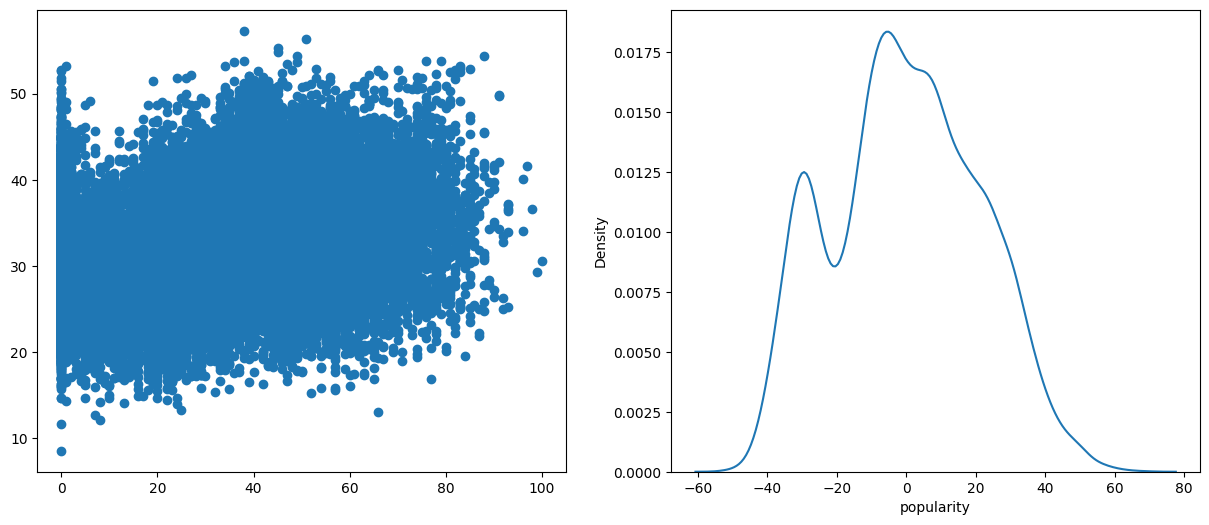

In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
xgbreg=XGBRegressor()
xgbrfreg=XGBRFRegressor()
dtree=DecisionTreeRegressor()
bayridge=BayesianRidge()
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual=y_test-prediction
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)
    
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()
import warnings
warnings.filterwarnings("ignore")
model(lr)

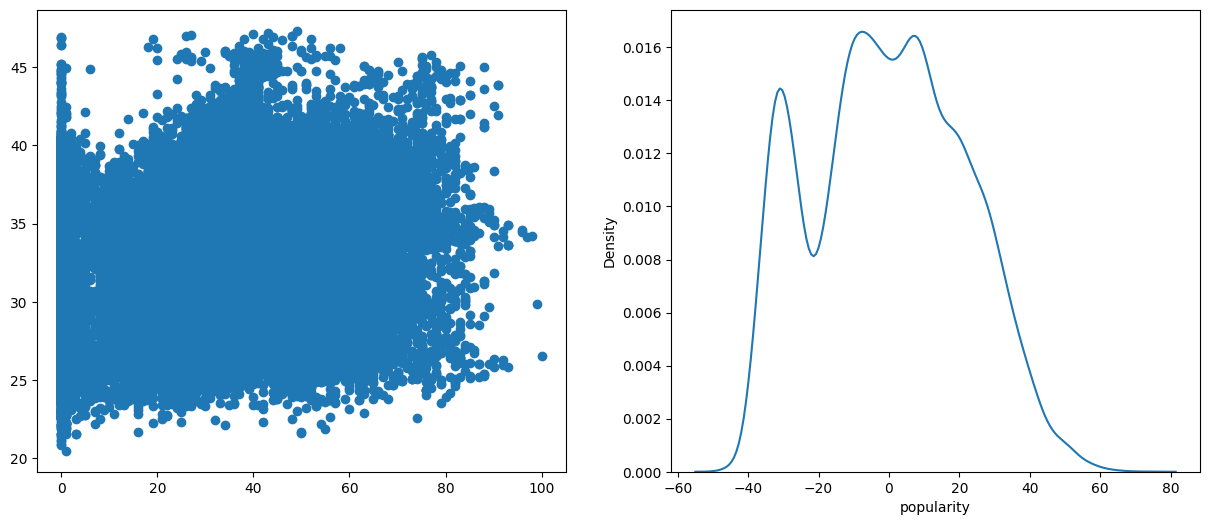

In [68]:
model(lasso)

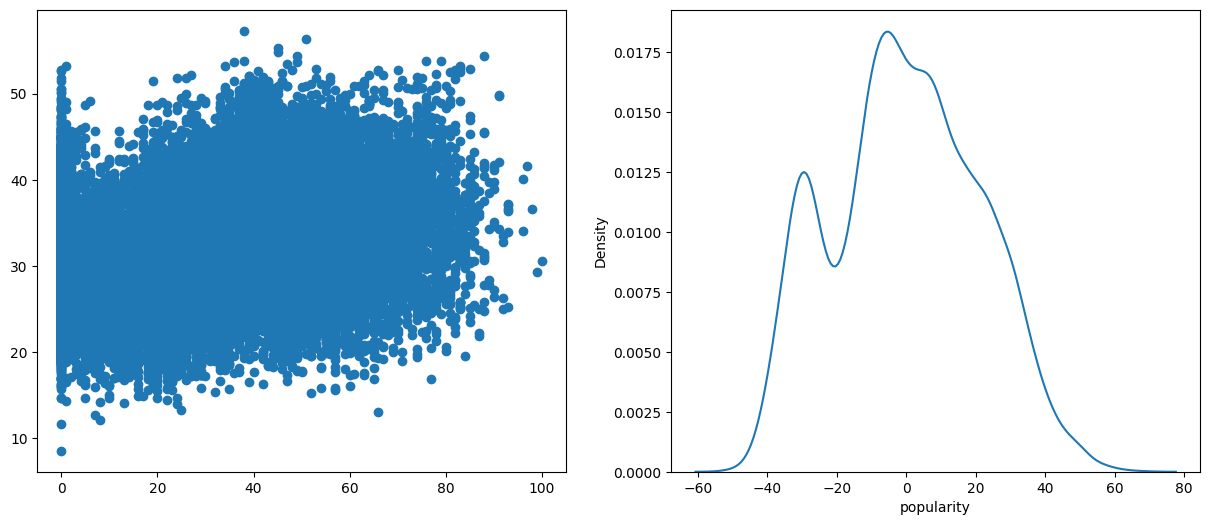

In [69]:
model(ridge)

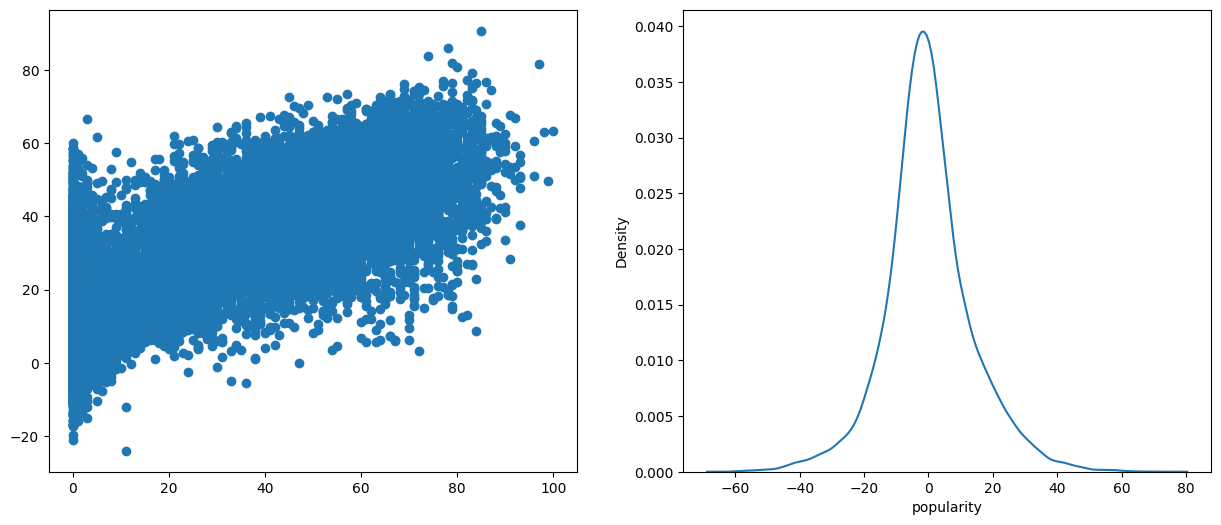

In [70]:
model(xgbreg)

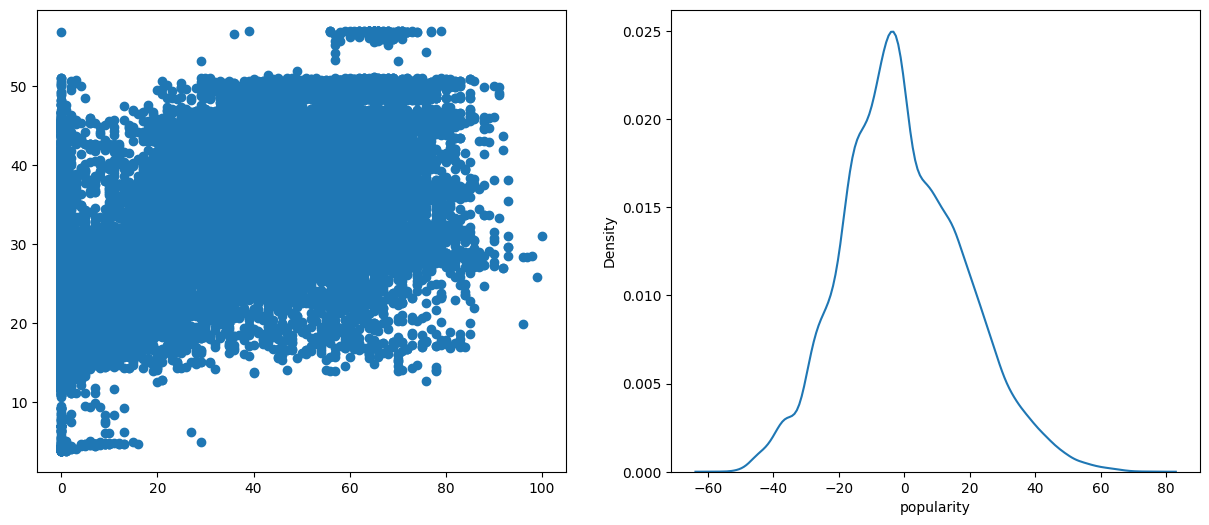

In [71]:
model(xgbrfreg)

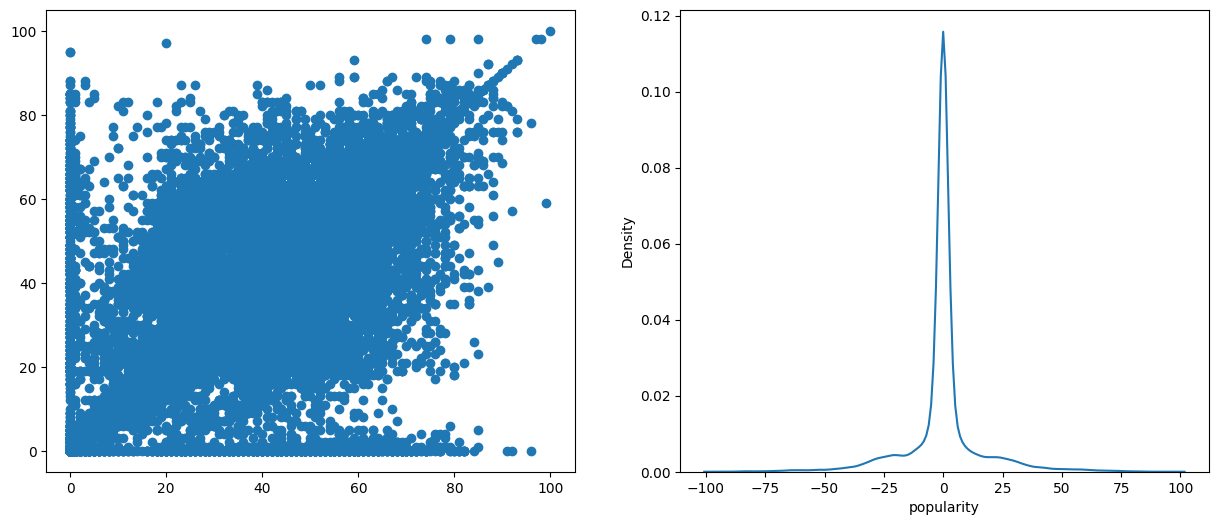

In [72]:
model(dtree)

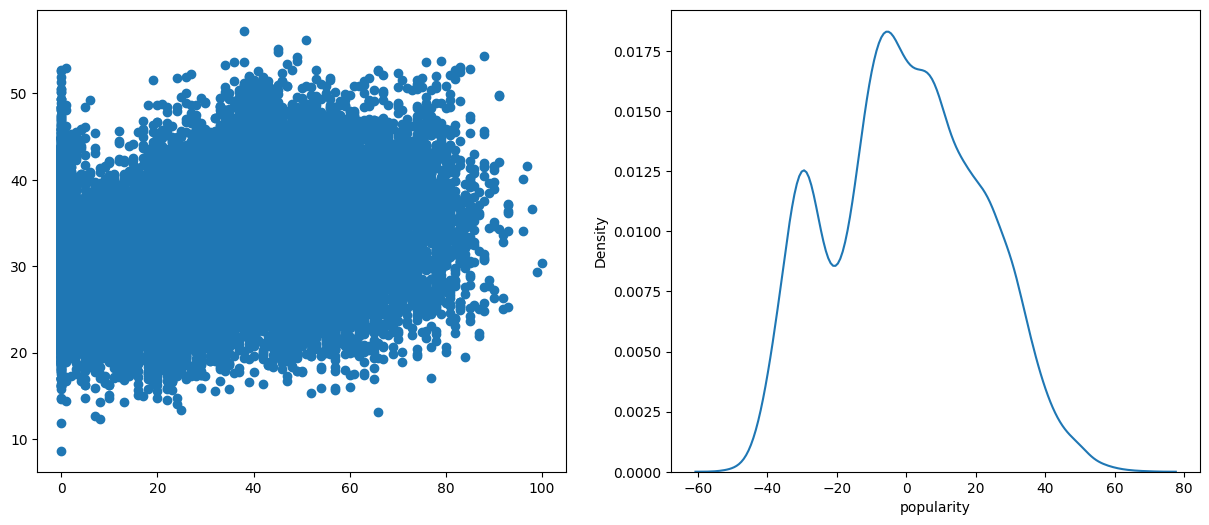

In [73]:
model(bayridge)

#### Comments:
1. Among the models, Xgboost is producing the most encouraging results.

2. Ineffectiveness of linear models

3. Additionally doing well is the decission tree.


#### Performance metrics

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
algos=[lr, lasso, ridge, xgbreg, xgbrfreg, dtree, bayridge]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)

In [75]:
algosname=['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'XGBoostRandomForest','DecisionTree','BayesianRidge']
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])
metrics


,Model,MSE,ABMSE,R2_score
0,Linear Regression,455.348812,17.556276,0.077834
1,Lasso,465.894997,17.976374,0.056476
2,Ridge,455.348820,17.556298,0.077834
3,XGBoost,186.876335,10.006477,0.621541
4,XGBoostRandomForest,342.194730,14.705881,0.306992
5,DecisionTree,236.789300,7.775018,0.520457
6,BayesianRidge,455.357794,17.561725,0.077815


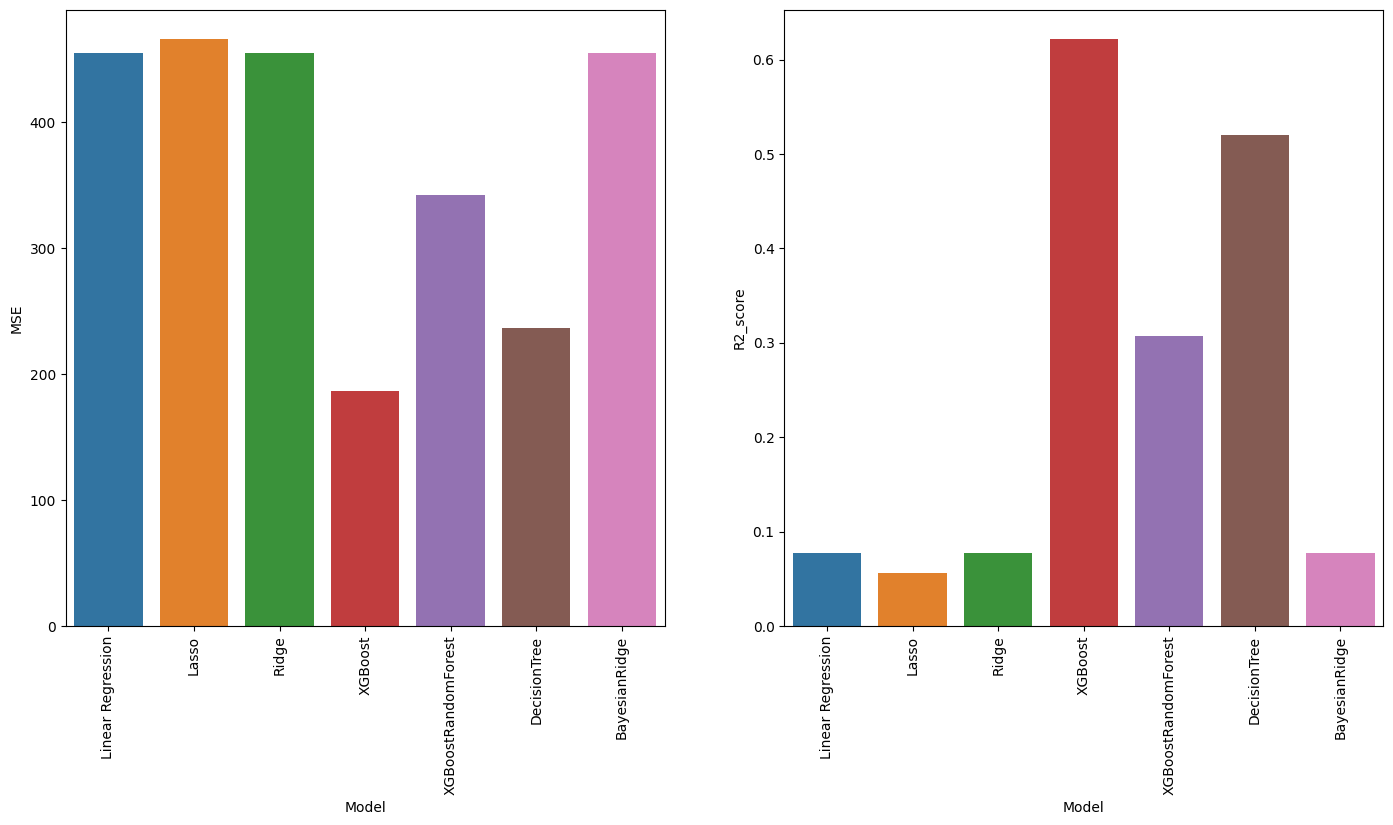

In [76]:
plt.figure(figsize=(17,8))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()

#### Comments:

1. From the above performance metrics, we see that the XGBoost (Regressor) and Decission Tree performs much better than the rest of the models.

2. XGBoost has the highest r2_score and the least mean squared error among the models, 0.62 and 186.87 correspondingly.

3. We would use this XGBoost model for future predictions.


#### Possible reason for the decission tree and xgboost model performing better than the linear models: It could be because the data itself is not linear. Hence, the tree based models are performing well. Both decission tree and XgBoost use tree based models for predictions rather than fitting a line or a curve to the data points.

Open to further comments/suggestions on why the tree models are performing better.